In [17]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [10, 5]

N = 10000
window = 100

In [3]:
uni_set = np.random.uniform(-1, 1, N)
norm_set = np.random.randn(N)

print(f'Uniform set: {uni_set.std()}')
print(f'Normal set: {norm_set.std()}')

Uniform set: 0.57488717246556
Normal set: 1.0121734168553105


In [35]:
rev_size = int(N/window)

uni_chunk = np.empty(rev_size)
uni_prog = np.empty(rev_size)
uni_var_chunk = np.empty(rev_size)
uni_var_prog = np.empty(rev_size)
uni_comp = np.empty(rev_size)
uni_var_comp = np.empty(rev_size)
norm_chunk = np.empty(rev_size)
norm_prog = np.empty(rev_size)
norm_var_chunk = np.empty(rev_size)
norm_var_prog = np.empty(rev_size)
norm_comp = np.empty(rev_size)
norm_var_comp = np.empty(rev_size)
prev = 0
wins = list(range(0, N, window))

for n, value in enumerate(wins):
    
    uni_chunk[n] = uni_set[value:(value+window)].std()
    uni_prog[n] = uni_set[:(value+window)].std()
    norm_chunk[n] = norm_set[value:(value+window)].std()
    norm_prog[n] = norm_set[:(value+window)].std()
    uni_comp[n] = uni_chunk[:n].mean()
    norm_comp[n] = norm_chunk[:n].mean()
    
    uni_var_chunk[n] = uni_set[value:(value+window)].var()
    uni_var_prog[n] = uni_set[:(value+window)].var()
    norm_var_chunk[n] = norm_set[value:(value+window)].var()
    norm_var_prog[n] = norm_set[:(value+window)].var()
    uni_var_comp[n] = uni_var_chunk[:n].mean()
    norm_var_comp[n] = norm_var_chunk[:n].mean()

C:\Users\Scrooge\AppData\Local\Temp\ipykernel_10700\1039621782.py:24: RuntimeWarning: Mean of empty slice.
  uni_comp[n] = uni_chunk[:n].mean()
C:\Users\Scrooge\AppData\Local\Temp\ipykernel_10700\1039621782.py:25: RuntimeWarning: Mean of empty slice.
  norm_comp[n] = norm_chunk[:n].mean()
C:\Users\Scrooge\AppData\Local\Temp\ipykernel_10700\1039621782.py:31: RuntimeWarning: Mean of empty slice.
  uni_var_comp[n] = uni_var_chunk[:n].mean()
C:\Users\Scrooge\AppData\Local\Temp\ipykernel_10700\1039621782.py:32: RuntimeWarning: Mean of empty slice.
  norm_var_comp[n] = norm_var_chunk[:n].mean()


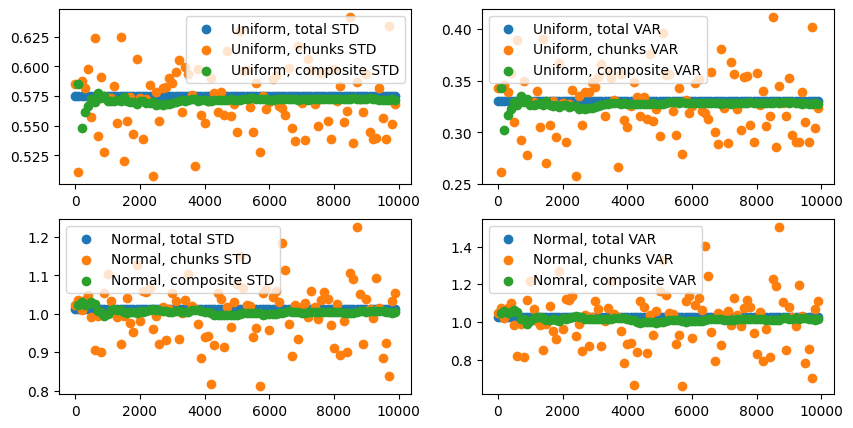

In [37]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].scatter(wins, [uni_set.std()]*len(wins), label='Uniform, total STD')
ax[0, 0].scatter(wins, uni_chunk, label='Uniform, chunks STD')
ax[0, 0].scatter(wins, uni_comp, label='Uniform, composite STD')
# ax[0, 0].scatter(wins, uni_prog, label='Uniform, progression STD')
ax[0, 0].legend()
ax[1, 0].scatter(wins, [norm_set.std()]*len(wins), label='Normal, total STD')
ax[1, 0].scatter(wins, norm_chunk, label='Normal, chunks STD')
ax[1, 0].scatter(wins, norm_comp, label='Normal, composite STD')
# ax[1, 0].scatter(wins, norm_prog, label='Normal, progression STD')
ax[1, 0].legend()
# ax[1, 0].set_ylim(-.1, .1)
ax[0, 1].scatter(wins, [uni_set.var()]*len(wins), label='Uniform, total VAR')
ax[0, 1].scatter(wins, uni_var_chunk, label='Uniform, chunks VAR')
ax[0, 1].scatter(wins, uni_var_comp, label='Uniform, composite VAR')
# ax[0, 1].scatter(wins, uni_var_prog, label='Uniform, progression VAR')
ax[0, 1].legend()
ax[1, 1].scatter(wins, [norm_set.var()]*len(wins), label='Normal, total VAR')
ax[1, 1].scatter(wins, norm_var_chunk, label='Normal, chunks VAR')
ax[1, 1].scatter(wins, norm_var_comp, label='Nomral, composite VAR')
# ax[1, 1].scatter(wins, norm_var_prog, label='Normal, progression VAR')
ax[1, 1].legend()
#ax[1, 1].set_ylim(-.1, .1)
# fig.set_size_inches=(8, 16)
# ax[1, 0].plot(uni_set)
# ax[1, 1].plot(norm_set)

In [58]:
print(f'Uniform STD: {uni_set.std()}, Uniform composite STD: {uni_comp[-1]}, Uniform mean STD: {uni_chunk.mean()}')
print(f'Normal STD: {norm_set.std()}, Normal composite STD: {norm_comp[-1]}, Normal mean STD: {norm_chunk.mean()}')
print(f'Uniform VAR: {uni_set.var()}, Uniform composite VAR: {uni_var_comp[-1]}, Uniform mean VAR: {uni_var_chunk.mean()}')
print(f'Normal VAR: {norm_set.var()}, Normal composite VAR: {norm_var_comp[-1]}, Normal mean VAR: {norm_var_chunk.mean()}')
norm_calc_std = np.sqrt(np.sum(norm_var_chunk))
uni_calc_std = np.sqrt(np.sum(uni_var_chunk))
print(f'Normal combined std: {norm_calc_std}, Uniform combined std: {uni_calc_std}')

Uniform STD: 0.57488717246556, Uniform composite STD: 0.5719448233844897, Uniform mean STD: 0.5719104268945212
Normal STD: 1.0121734168553105, Normal composite STD: 1.0037725581844168, Normal mean STD: 1.004281845937797
Uniform VAR: 0.33049526106544647, Uniform composite VAR: 0.3278528358822619, Uniform mean VAR: 0.3278062888564945
Normal VAR: 1.0244950257885541, Normal composite VAR: 1.0128210916761582, Normal mean VAR: 1.0138168297887364
Normal combined std: 10.068847152423839, Uniform combined std: 5.7254370039019244


gnirts
strin
gnirts


In [64]:
print(0.57488717246556/0.5719448233844897)
print(1.0121734168553105/1.0037725581844168)
print(0.33049526106544647/0.3278528358822619)
print(1.0244950257885541/1.0128210916761582)

1.0051444631733162
1.0083692850560577
1.0080597905339868
1.0115261562069924


['thing', 'not', 'string']